### 1. <a id='importation'>Importation des bibliothèques</a>

In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime
import time

# Ignorer les avertissements
import warnings
warnings.filterwarnings('ignore')

DELIMITER = "--------------------------------"

---

### 2. <a id='chargement'>Chargement des données</a>

In [2]:
# Chargement des données
path = "../data/"
out_time_data = pd.read_csv(path + "out_time.csv")

---

### 3. <a id='eda_out_time_data'>EDA pour le dataset `out_time_data`</a>

#### 3.1. <a id='3_lecture'>Lecture du dataset</a>

In [12]:
# Affichage des 5 premières lignes du dataset
print(out_time_data.head())

print(DELIMITER)

# Affichage des 5 dernières lignes du dataset
print(out_time_data.tail())


   Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   
1           2         NaN  2015-01-02 18:22:17  2015-01-05 17:48:22   
2           3         NaN  2015-01-02 16:59:14  2015-01-05 17:06:46   
3           4         NaN  2015-01-02 17:25:24  2015-01-05 17:14:03   
4           5         NaN  2015-01-02 18:31:37  2015-01-05 17:49:15   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                  NaN  2015-01-07 17:09:06  2015-01-08 17:34:04   
2  2015-01-06 16:38:32  2015-01-07 16:33:21  2015-01-08 17:24:22   
3  2015-01-06 17:07:42  2015-01-07 16:32:40  2015-01-08 16:53:11   
4  2015-01-06 17:26:25  2015-01-07 17:37:59  2015-01-08 17:59:28   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58  ...   
1  2015-01-09 16:5

#### 3.2. <a id='3_analyse'>Analyse des données</a>

In [13]:
# Informations de base
print("Informations de base :")
out_time_data.info()
print(DELIMITER)

# Sommaire des statistiques
print("Sommaire des statistiques :")
print(out_time_data.describe())

Informations de base :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB
--------------------------------
Sommaire des statistiques :
        Unnamed: 0  2015-01-01  2015-01-14  2015-01-26  2015-03-05  \
count  4410.000000         0.0         0.0         0.0         0.0   
mean   2205.500000         NaN         NaN         NaN         NaN   
std    1273.201673         NaN         NaN         NaN         NaN   
min       1.000000         NaN         NaN         NaN         NaN   
25%    1103.250000         NaN         NaN         NaN         NaN   
50%    2205.500000         NaN         NaN         NaN         NaN   
75%    3307.750000         NaN         NaN         NaN         NaN   
max    4410.000000         NaN         NaN         NaN         NaN   

       2015-05-01  2015-07-17  2015-09-17  2015-10-02  2015-11-09  2015-11-10  \
count         0.0 

#### 3.3. <a id='3_manquantes'>Détection des valeurs manquantes</a>


In [14]:
# Nombre de valeurs nulles par colonnes
print(out_time_data.isnull().sum())

Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64


#### 3.4. <a id='3_dupliquees'>Détection des valeurs dupliquées</a>


In [15]:
print(f"Nombre de valeurs dupliquées : {out_time_data.duplicated().sum()}")

Nombre de valeurs dupliquées : 0


**Résumé du dataset out_time_data**

**Structure générale**
- Nombre de lignes : 4410
- Nombre de colonnes : 262

**Colonnes**
1. *EmployeeID (int64)*
- Identifiant unique pour chaque employé
- Pas de valeurs manquantes

2. Les colonnes suivantes sont les retours de badgeuse en fonction du jours et par employé.

**Points notables**
- Pas de doublons dans le dataset, donc aucun besoin de gérer ce cas de figure
- Les dates de badgeage sont au format date heure

#### 3.5. <a id='3_nettoyage'>Nettoyage des données</a>

Pour gérer le cas des données manquantes dans le dataset out_time_data, nous allons supprimer les colonnes vides.


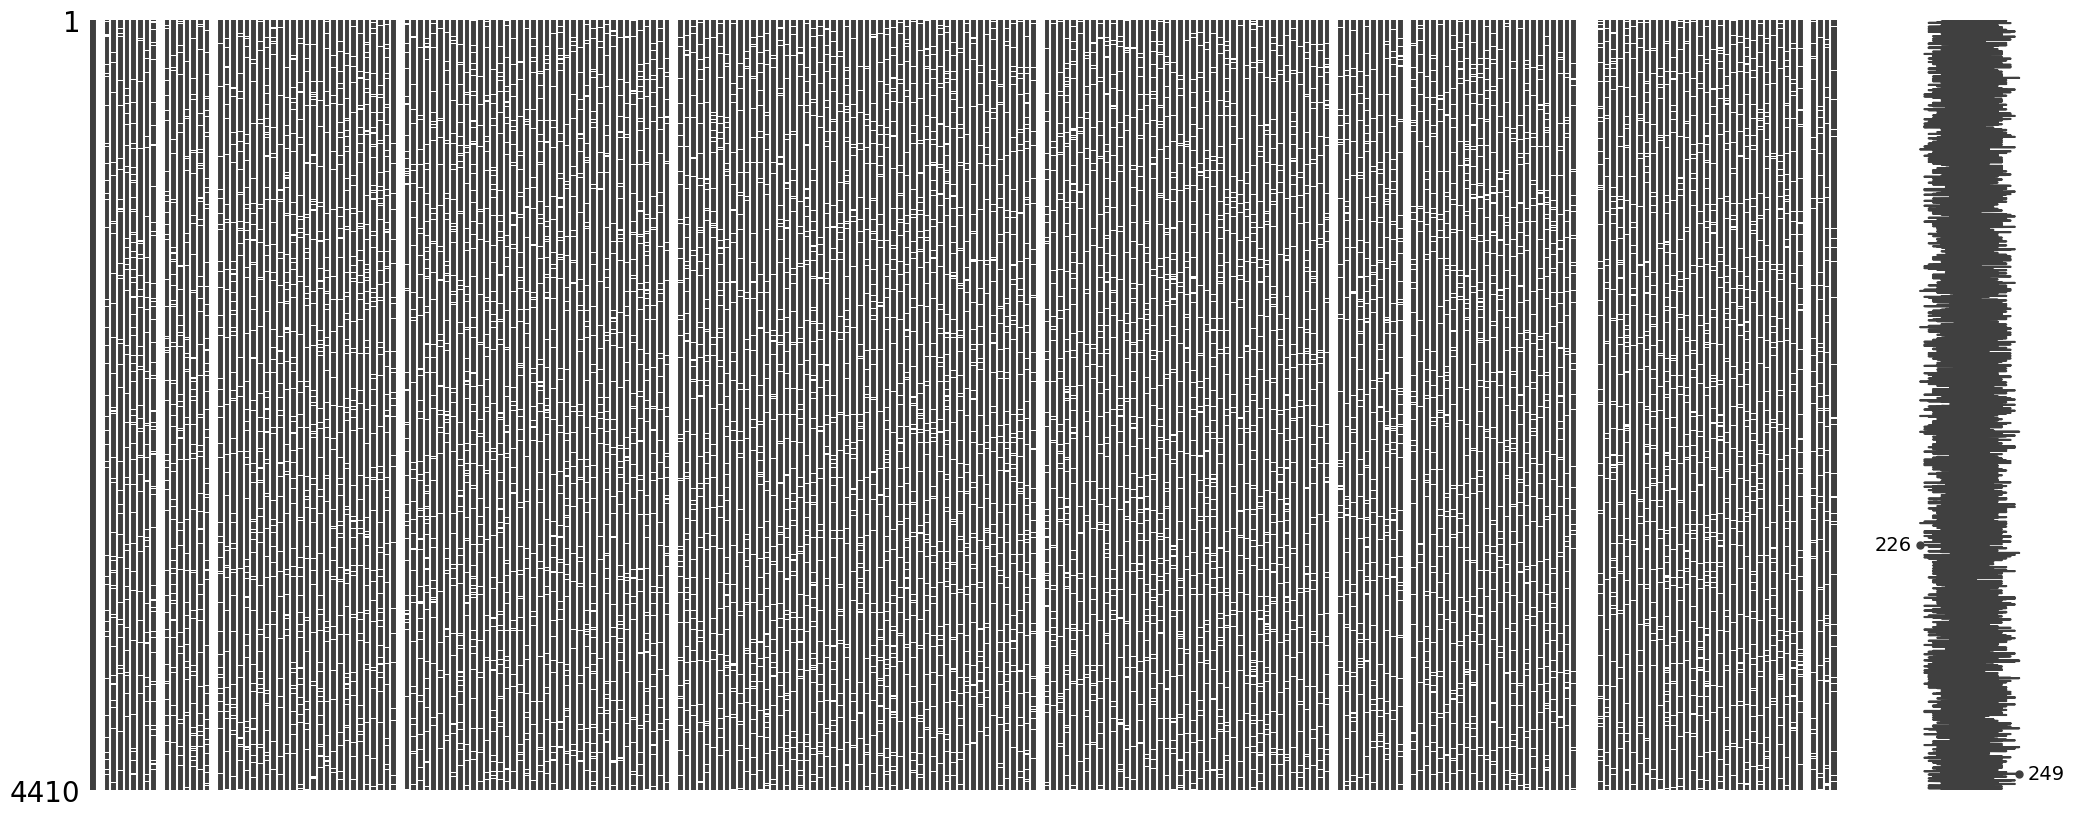

2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
2015-01-07     209
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 261, dtype: int64


In [3]:
##%%
#Pour que ça soit pratique, on va renommer la première colonne
out_time_data.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)

# Visualisation des données manquantes
msno.matrix(out_time_data)
plt.show()

# Identifier les colonnes non numériques (type 'object')
non_numeric_columns = out_time_data.select_dtypes(include=['object']).columns
for col in non_numeric_columns:
    # Convertir les dates en format datetime
    out_time_data[col] = pd.to_datetime(out_time_data[col])


# Affichage du nombre de données manquantes
print(out_time_data.isnull().sum()[out_time_data.isnull().sum() > 0])
plt.show()

#### 3.6. <a id='3_univariee'>Analyse univariée</a>

In [4]:
# Certaines colonnes sont vides pour tous les employés. Il semble nécessaire afin de ne pas rajouter du bruit à notre analyse, de les supprimer.


# Affichage des colonnes restantes
print(f"Colonnes non numériques après suppression : {non_numeric_columns.tolist()}")

columns_to_save = [out_time_data.columns[0]] + non_numeric_columns.tolist()
filtered_data = out_time_data[columns_to_save]

# Sauvegarder ce sous-ensemble dans un fichier CSV
filtered_data.to_csv(path + "out_time_clean.csv", index=False)


Colonnes non numériques après suppression : ['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-15', '2015-01-16', '2015-01-19', '2015-01-20', '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-27', '2015-01-28', '2015-01-29', '2015-01-30', '2015-02-02', '2015-02-03', '2015-02-04', '2015-02-05', '2015-02-06', '2015-02-09', '2015-02-10', '2015-02-11', '2015-02-12', '2015-02-13', '2015-02-16', '2015-02-17', '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-23', '2015-02-24', '2015-02-25', '2015-02-26', '2015-02-27', '2015-03-02', '2015-03-03', '2015-03-04', '2015-03-06', '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12', '2015-03-13', '2015-03-16', '2015-03-17', '2015-03-18', '2015-03-19', '2015-03-20', '2015-03-23', '2015-03-24', '2015-03-25', '2015-03-26', '2015-03-27', '2015-03-30', '2015-03-31', '2015-04-01', '2015-04-02', '2015-04-03', '2015-04-06', '2015-04-07', '2015-04-08', '2015-04-09', '2015-04-10', '20

3.6.1. Histogramme

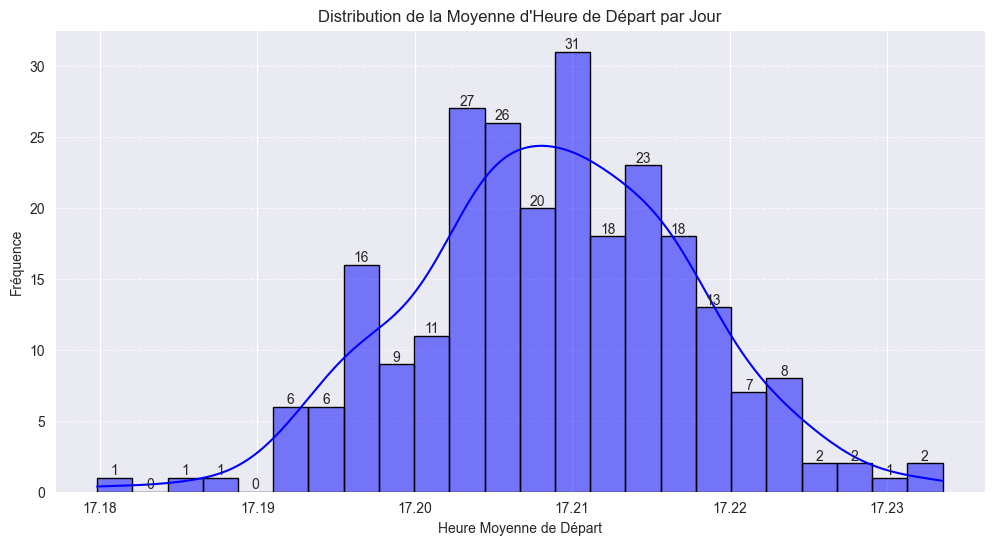

In [18]:
daily_avg_hours = pd.DataFrame()

# Conversion et extraction des heures moyennes par jour
all_days = []
all_avg_hours = []

for col in non_numeric_columns:
    # Nettoyage et conversion
    out_time_data[col] = pd.to_datetime(out_time_data[col], errors='coerce')
    
    # Extraction de la date et de l'heure
    out_time_data['Date'] = out_time_data[col].dt.date
    out_time_data['Hour'] = out_time_data[col].dt.hour
    
    # Calcul de la moyenne des heures de départ par jour
    daily_mean = out_time_data.groupby('Date')['Hour'].mean().dropna()

    # Stocker les valeurs
    all_days.extend(daily_mean.index)
    all_avg_hours.extend(daily_mean.values)

# Création d'un DataFrame avec les résultats
daily_avg_hours['Date'] = all_days
daily_avg_hours['Moyenne Heure Départ'] = all_avg_hours

# Tri par date
daily_avg_hours = daily_avg_hours.sort_values(by="Date")

# Création de l'histogramme
plt.figure(figsize=(12, 6))
sns.histplot(daily_avg_hours["Moyenne Heure Départ"], bins=24, kde=True, color="blue", edgecolor="black")

plt.title("Distribution de la Moyenne d'Heure de Départ par Jour")
plt.xlabel("Heure Moyenne de Départ")
plt.ylabel("Fréquence")


# Affichage des valeurs sur le graphe
ax = plt.gca()
for i in ax.containers:
    ax.bar_label(i)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Observations**
- On peut voir que les employés partent aux alentours de 17h21


--------